In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

49


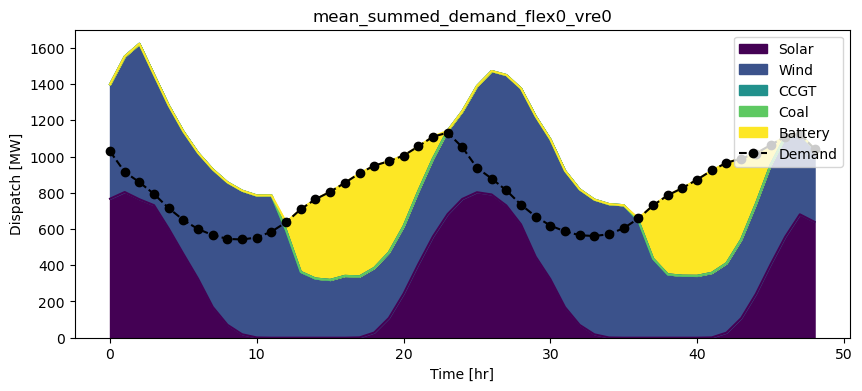

49


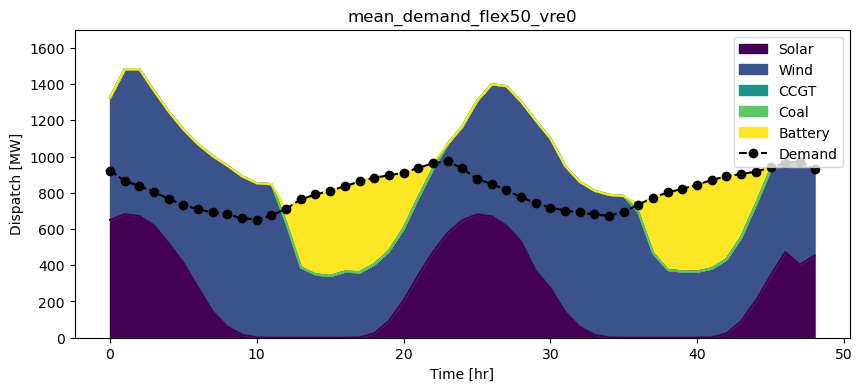

49


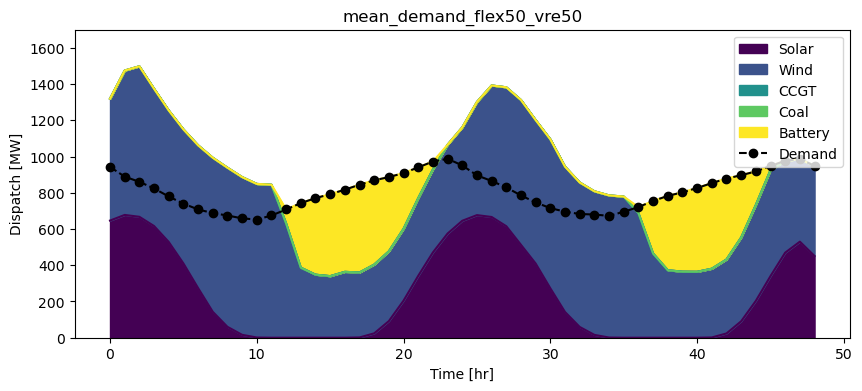

49


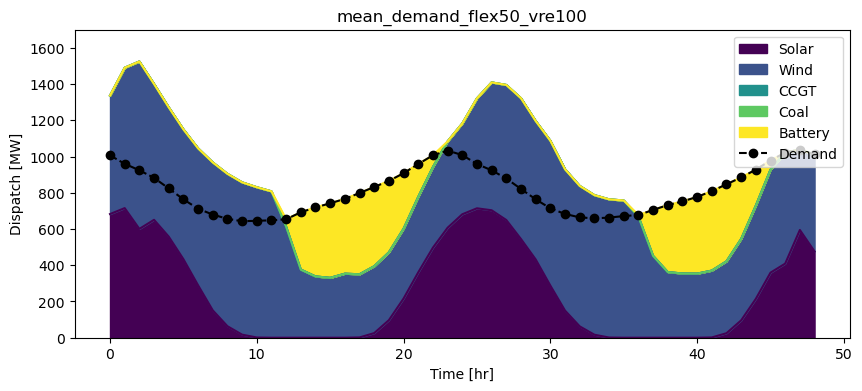

49


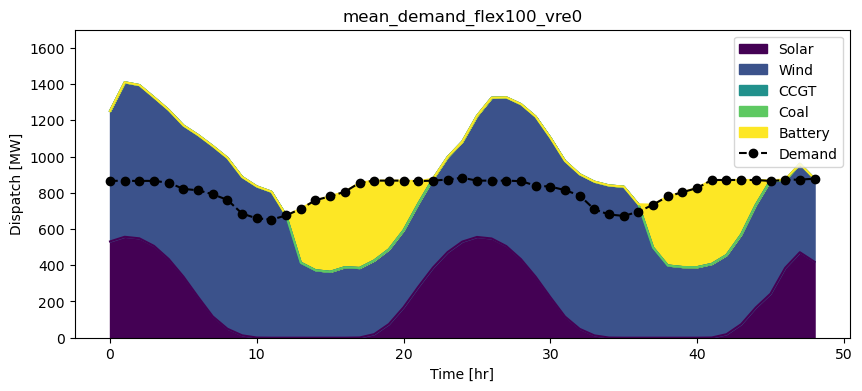

49


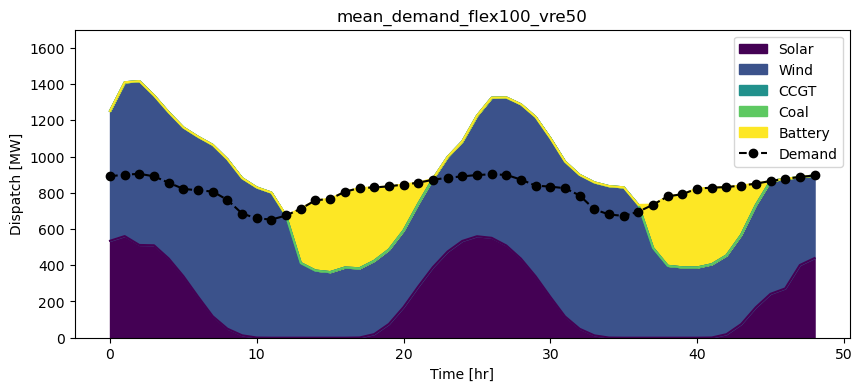

49


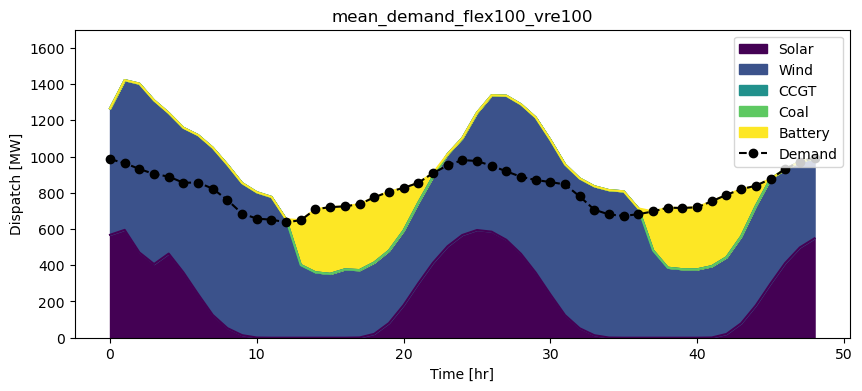

49


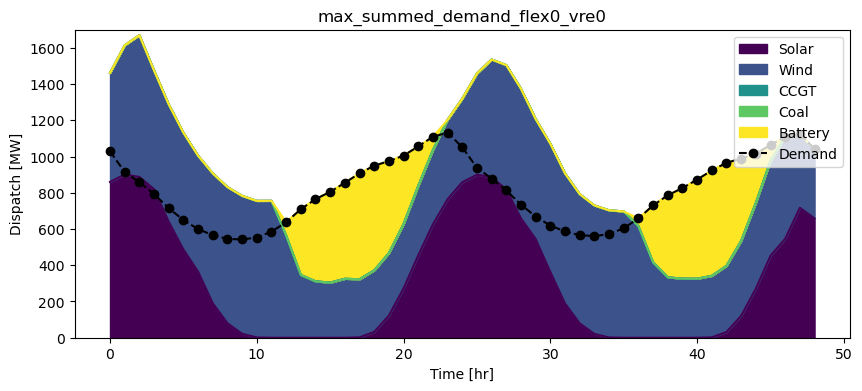

49


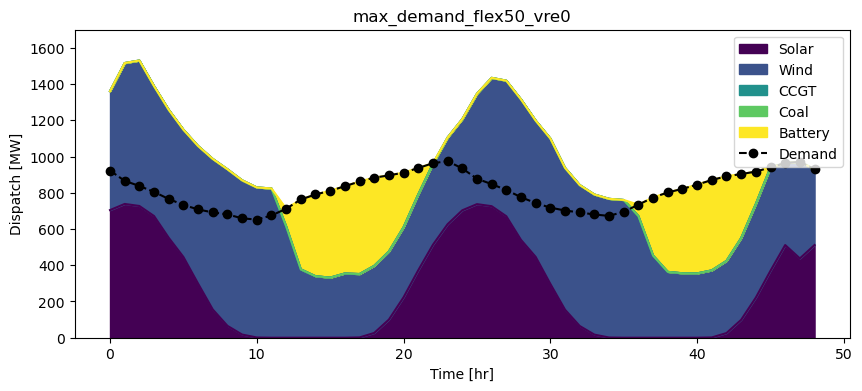

49


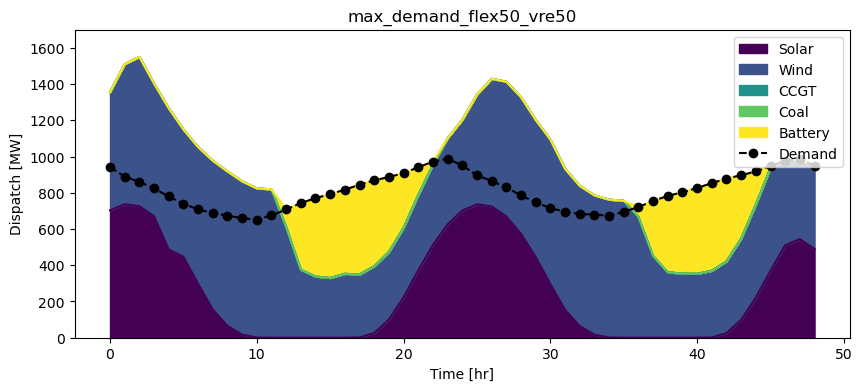

49


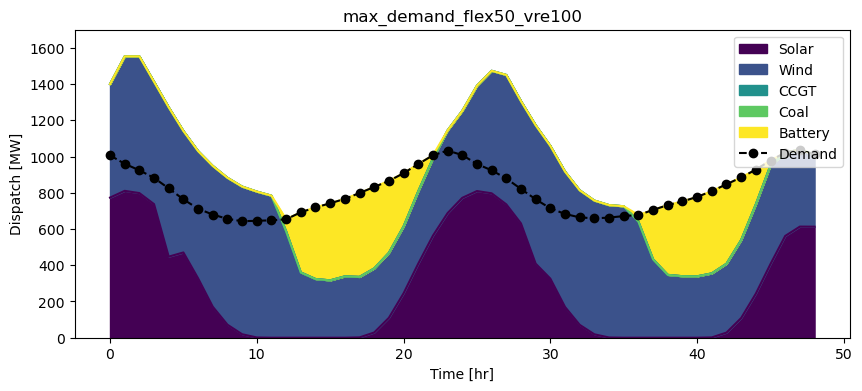

49


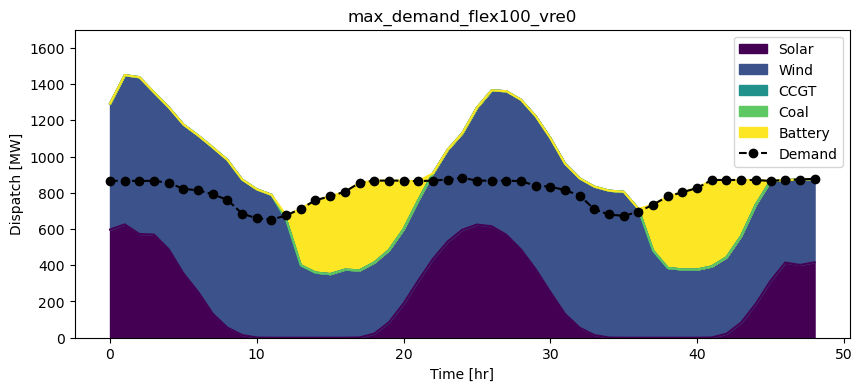

49


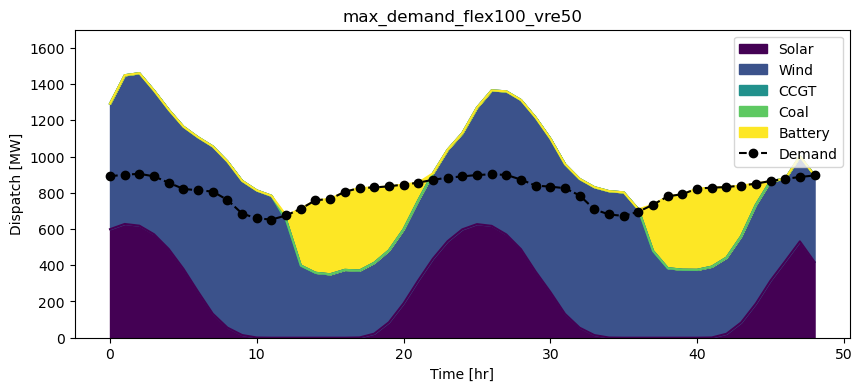

49


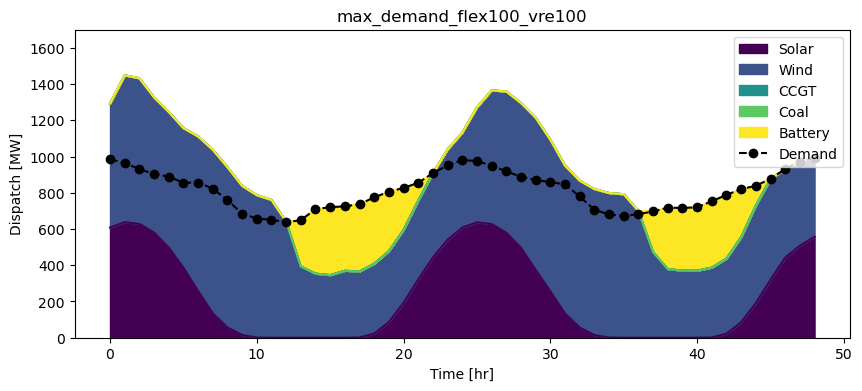

In [10]:
name_demand_flex_input = ["demand_flex0_vre0", "demand_flex50_vre0", "demand_flex50_vre50", 
"demand_flex50_vre100", "demand_flex100_vre0", "demand_flex100_vre50", "demand_flex100_vre100"]
price_scenario_ls = [ "Low", "mean", "max"]
main_folder = '/Users/adrienguenard/Desktop/MIT/2.AeroAstro/IDS.522/Project/1.WIP/DSF/DSF_optimization/Results'



for price in price_scenario_ls:
    for flex_scenario in name_demand_flex_input:

        csv_file_path = f"{main_folder}/{price}/profiles_{flex_scenario}.csv"

        df = pd.read_csv(csv_file_path)
        df.reset_index(drop=True, inplace=True)

        # Set negative values to zero
        df = df.applymap(lambda x: max(0, x))

        
        fig, ax = plt.subplots(figsize=(10, 4))

        time = [i for i in range(49)]

        df["Time"] = time
        print(len(df))
        # Plot stacked area for the first five columns
        df.plot.area(x="Time", y=['Solar', 'Wind', 'CCGT', 'Coal', 'Battery'], ax=ax, stacked=True, colormap='viridis')


        # Plot Demand as a black dotted line
        df['Demand'].plot(x=df.index, y='Demand', color='black', linestyle='--', marker='o', label='Demand')

        # Customize plot
        ax.set_title(f'{price}_{flex_scenario}')
        ax.set_ylim(top=1700)
        ax.set_xlabel('Time [hr]')
        ax.set_ylabel('Dispatch [MW]')
        ax.legend(loc="upper right")

        plt.show()

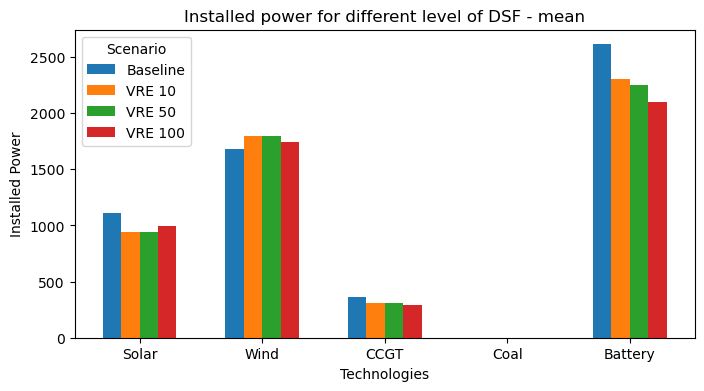

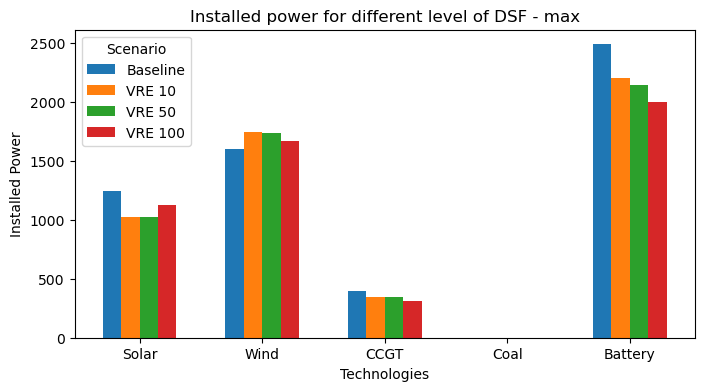

In [12]:
name_demand_flex_input = ["summed_demand_flex0_vre0", "demand_flex50_vre0", "demand_flex50_vre50", 
"demand_flex50_vre100"]
price_scenario_ls = [ "mean", "max"]
main_folder = '/Users/adrienguenard/Desktop/MIT/2.AeroAstro/IDS.522/Project/1.WIP/DSF/DSF_optimization/Results/Final_results'



for price in price_scenario_ls:
    matrix_Power = np.zeros((5,4))

    for i, flex_scenario in enumerate(name_demand_flex_input):

        csv_file_path = f"{main_folder}/{price}/Power{flex_scenario}.csv"




        df = pd.read_csv(csv_file_path)
        df.reset_index(drop=True, inplace=True)

        matrix_Power[:,i] = df["Installed Power"]



    categories = ['Solar', 'Wind', 'CCGT', 'Coal', 'Battery']
    legend_labels = ["Baseline", 'VRE 10', 'VRE 50', 'VRE 100']

    #Plotting
    fig, ax = plt.subplots(figsize=(8, 4))

    bar_width = 0.15  # Adjust the width of each bar
    #space_between_groups = 0.4  # Adjust the space between groups
    bar_positions = np.arange(len(categories))

    for i, label in enumerate(legend_labels):
        bars = ax.bar(bar_positions + i * (bar_width ), matrix_Power[:, i], bar_width, label=label)

    # Customize the plot
    ax.set_xticks(bar_positions + (len(legend_labels) - 1) * (bar_width ) / 2)
    ax.set_xticklabels(categories)
    ax.legend(title='Scenario')
    ax.set_xlabel('Technologies')
    ax.set_ylabel('Installed Power')
    ax.set_title(f'Installed power for different level of DSF - {price}')

    plt.show()

    plt.show()

In [ ]:
class compute_mix_price:
    def __init__(self, main_folder) -> None:

        self.main_folder = main_folder

    def read_price_csv(self, scenario):

        self.fixed_cost = pd.read_csv(f"{self.main_folder}/fixed_cost_{scenario}.csv")

        self.variable_cost = pd.read_csv(f"{self.main_folder}/variable_cost_{scenario}.csv")

    def read_generation_power(self, price_scenario_ls, name_demand_flex_input):
        for price in price_scenario_ls:
            for flex_scenario in name_demand_flex_input:

                csv_file_path_gen = f"{main_folder}/Results/Final_results/{price}/Generation{flex_scenario}.csv"
                csv_file_path_power = f"{main_folder}/Results/Final_results/{price}/Generation{flex_scenario}.csv"

                self.df_generation = pd.read_csv(csv_file_path_gen)
                self.df_power = pd.read_csv(csv_file_path_gen)



In [13]:
df_test = pd.read_csv('/Users/adrienguenard/Desktop/MIT/2.AeroAstro/IDS.522/Project/1.WIP/DSF/DSF_optimization/summed_demand_flex0_vre0.csv')

print(np.argmax(df_test))

4960
